In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
####
#  matplotlib의 기본 scheme 말고 seaborn scheme을 세팅하고, 일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용하면 편하다.
plt.style.use('seaborn')
sns.set(font_scale=2.5)
####

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 1. 데이터셋 확인 -  대부분의 캐글 데이ㅌ들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
### 2. 탐색적 데이터 분석(Exploratory data analysis) - 여러 feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
### 3. Feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 features를 engineering합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
### 4. Model 만들기 - sklearn을 사용해 모데을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 있습니다.
### 5. 모델 학습 및 예측 - trainset을 가지고 모델을 학습시킨후, testset을 가지고 prediction합니다.
### 6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는지 확인해봅니다.

In [6]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
### 우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare이며, 예측하려는 target label은 Survived입니다.

In [6]:
### pandas dataframe에는 describe() 메소드가 있는데, 이를 쓰면 각 feature가 가진 통계치들을 반환해줍니다.

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# 1.1 Null data check

In [19]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()) / df_train[col].shape[0])
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [18]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [20]:
### Train, Test set에서 Age(둘다 약 20%), Cabin(둘 다 약 80%), Embarked가 null data가 존재하는 것을 볼 수 있다.

In [21]:
### MSNO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있다.

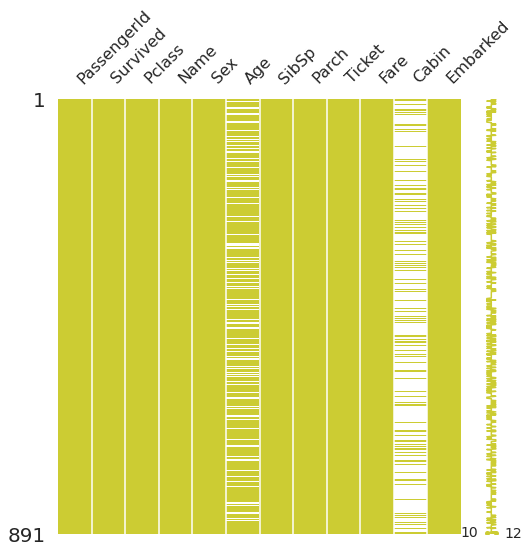

In [4]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.8, 0.2))

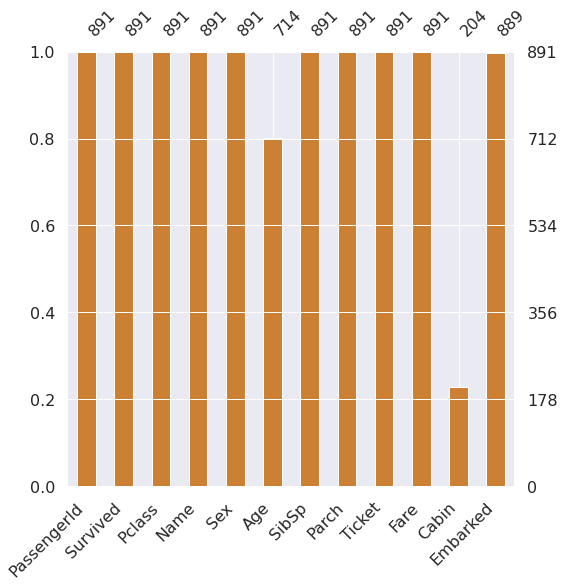

In [5]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

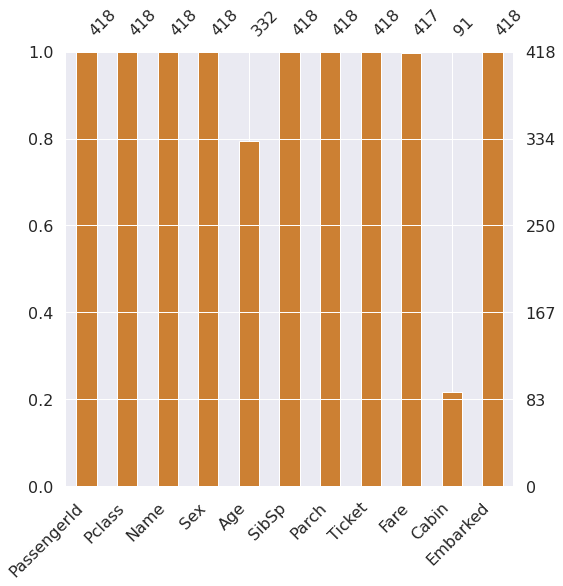

In [6]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

In [7]:
# 1.2 Target label 확인

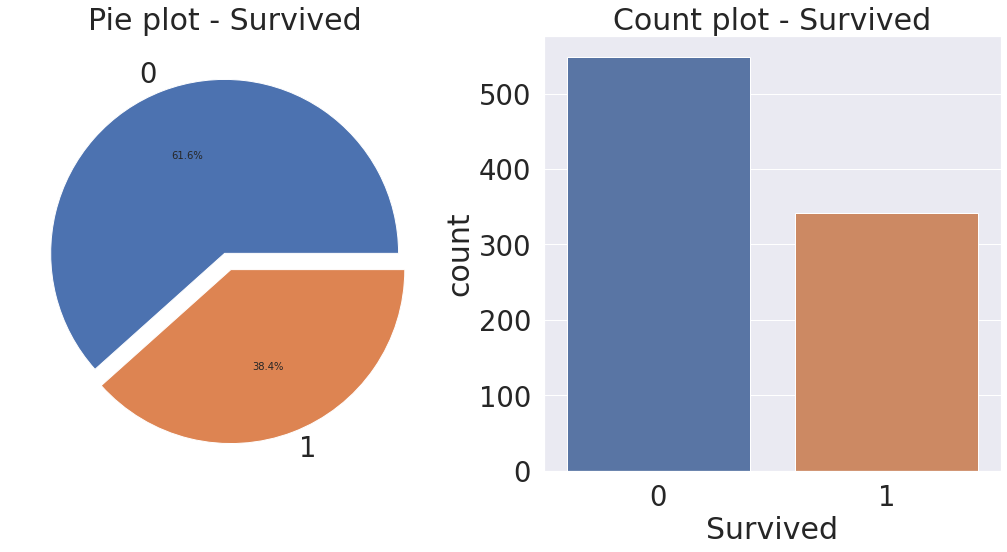

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()


In [16]:
### 38.4%만 살아 남았습니다.
### target, label 의 분포가 제법 균일(balanced)합니다. 불균일한 경우, 예를 들어서 100 중 1이 99, 0이 1개인 경우에는 만약 모델이 모든 것을 1이라 해도 정확도가 99%가 나오게 됩니다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됩니다. 지금 문제에서는 그렇지 않으니 계속 진행하겠습니다.

In [18]:
# 2. Exploratory data analysis

In [19]:
### 데이터 안에 숨겨진 사실을 찾기 위해서는 적절한 시각화가 필요합니다.

In [20]:
# 2.1 Pclass
### Pclass는 ordinal 서수형 데이터입니다. 카테고리이면서 순서가 있는 데이터입니다.
### 먼저 Pclass에 따른 생존률의 차이를 살펴보겠습니다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe 에서 groupby를 사용하면 쉽게 할 수 있습니다. 또한 pivot 이라는 메소드도 있습니다
### Pclass, Survived를 가져온 후, pclass로 묶습니다. 그러고 나면 각 pclass마다 0, 1이 count가 되는데, 이를 평균내면 각 pclass 별 생존률이 나옵니다.
### 아래와 같이 count()를 하면, 각 class에 몇명이 있는지 확인할 수 있으며, sum()을 하면, 216 명 중 생존한(survived=1) 사람의 총합을 주게 됩니다.

In [22]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [26]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [28]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [29]:
### grouped 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있습니다.

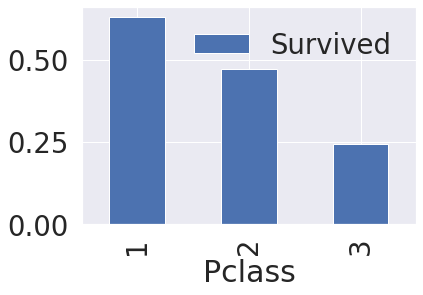

In [31]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

In [32]:
### 보다시피, Pclass가 좋을 수록 생존률이 높은 것을 볼 수 있습니다.
### seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해 볼 수 있습니다.

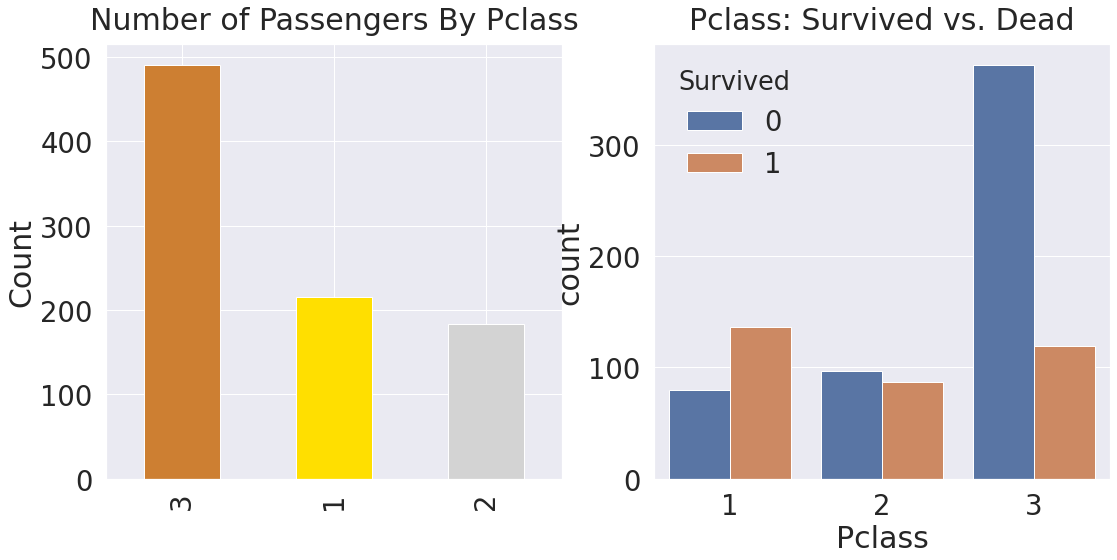

In [33]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead', y=y_position)
plt.show()

In [1]:
# 2.2 Sex

In [2]:
### 이번에는 성별로 생존률이 어떻게 달라지는 지 확인해보겠습니다
### 마찬가지로  pandas groupby와 seaborn countplot을 사용해서 시각해보겠습니다

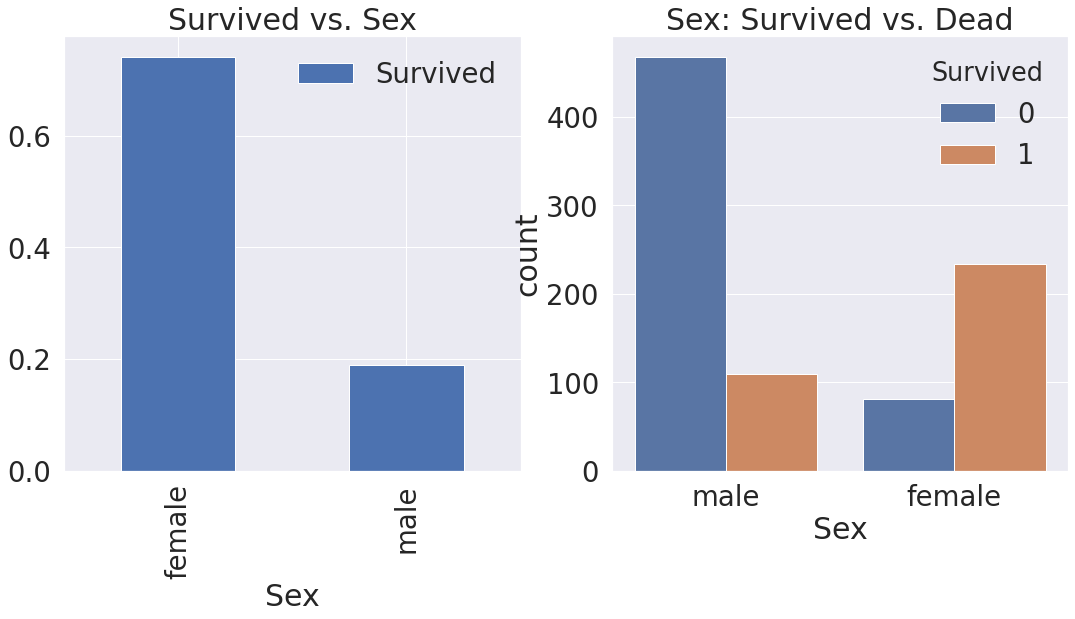

In [8]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')
plt.show()

In [9]:
### 보다시피 여성이 생존할 확률이 높습니다

In [10]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [12]:
### Pclass와 마찬가지로 sex도 예측 모델에 쓰일 중요한 feature임을 알 수 있습니다.

In [13]:
# 2.3 Both sex and Pclass

In [14]:
### 이번에는 sex, pclass 두가지에 관하여 생존이 어떻게 달라지 확인해 봅시다
### seaborn의 factorplot을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

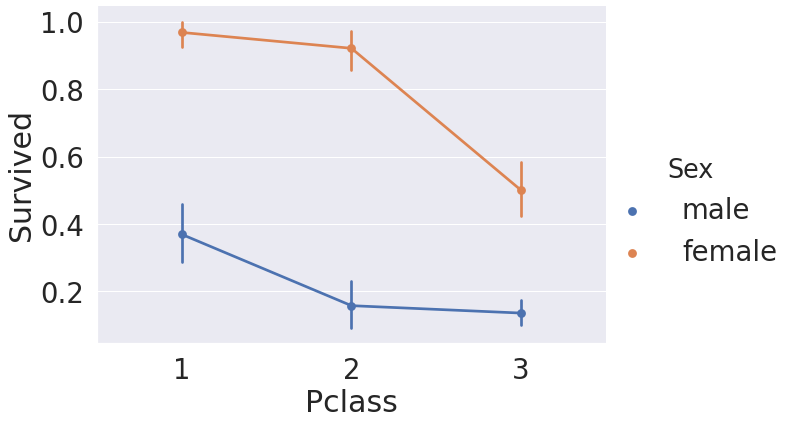

In [15]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6,aspect=1.5)

In [17]:
### 모든 클래스에서 female이 살 확률이 male 보다 높다.
### 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높다.
### 위 그래프는 hue 대신 colum으로 하면 아래와 같다

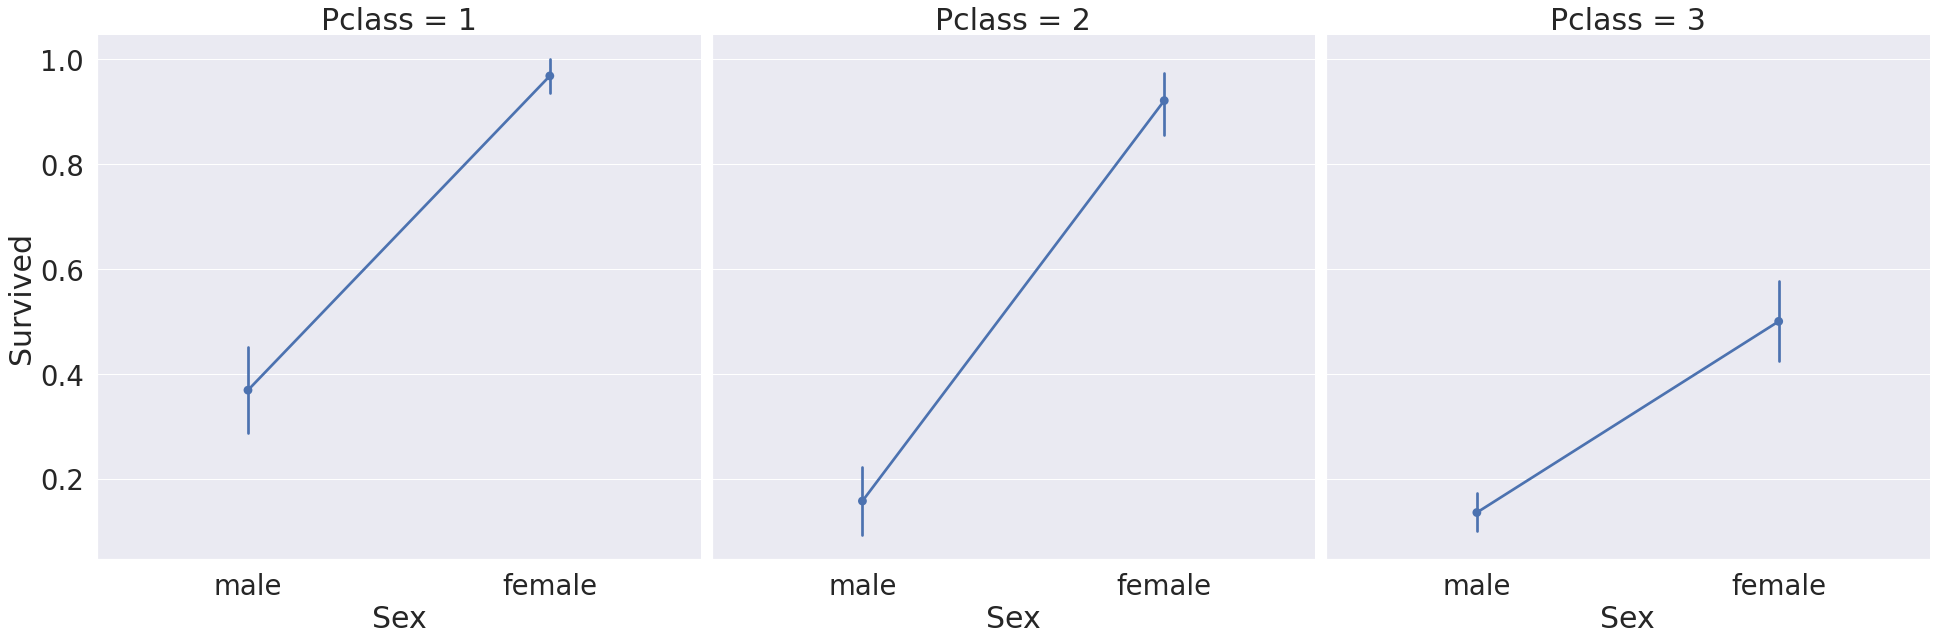

In [19]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

In [20]:
# 2.4 Age

In [21]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


In [22]:
### 생존에 따른 Age의 histogram을 그려보겠습니다

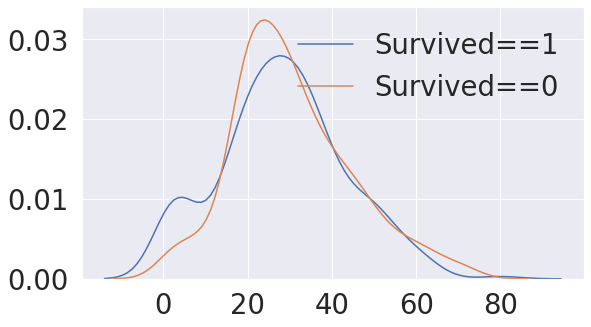

In [24]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

In [25]:
### 생존자 중 나이가 어린 경우가 많음을 볼 수 있다

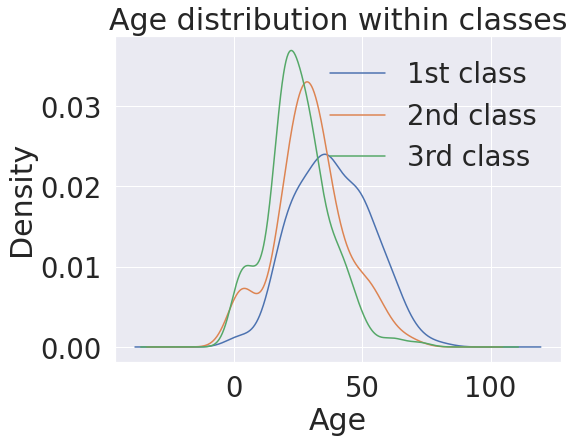

In [28]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

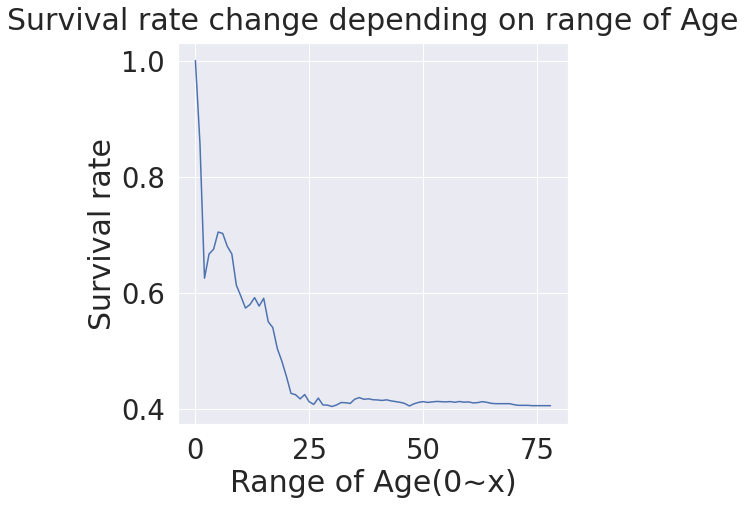

In [29]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [30]:
### 보시다시피 나이가 어릴 수록 생존률이 확실히 높은 것을 확인할 수 있습니다.
### 우리는 이 나이가 중요한 feature로 쓰일 수 있음을 확인했습니다

In [31]:
# 2.5 Pclass, Sex, Age

In [32]:
### 지금까지 본, sex, pclass, age, survived 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn의 violinplot입니다.
### x cnrdms 우리가 나눠서 보고싶어하는 case(여기서는 pclass, sex)를 나타내고, y축은 보고 싶어하는 distribution(Age)입니다.

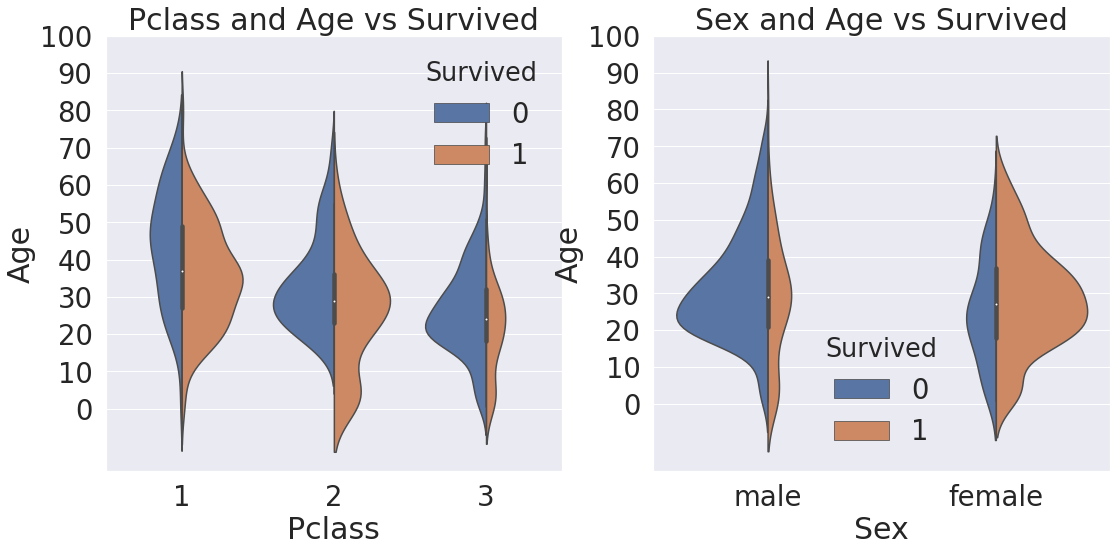

In [33]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass', 'Age',hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110, 10))
sns.violinplot('Sex','Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [34]:
### 왼쪽 그림은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생조여부에 따라 구분한 그래프입니다.
### 오른쪽 그림은 마찬가지로, sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프입니다.
### 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 볼 수 있습니다.
### 오른쪽 그림에서 보면, 명확히 여자가 많이 생존한 것을 볼 수 있습니다.
### 여성과 아이를 먼저 챙긴 것을 볼 수 있습니다.

In [35]:
# 2.6 Embark

In [36]:
### Embark는 탑승한 항구를 나타냅니다
### 위에서 해왔던 것과 비슷하게 탑승한 곳에 따른 생존률을 보겠습니다.

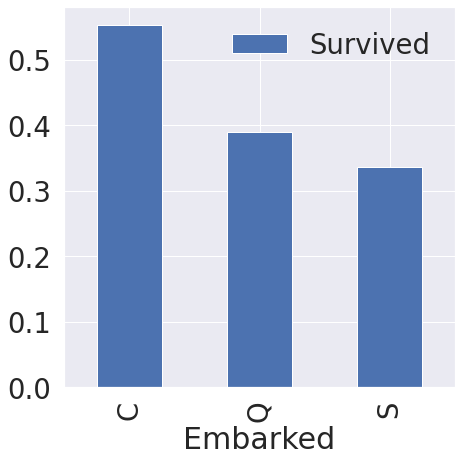

In [37]:
f, ax  = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [38]:
### 보다시피, 조금의 차이는 있지만 생존률은 좀 비슷한 것 같습니다. 그래도 C가 가장 높습니다
### 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용하겠습니다.
### 사실, 모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다. 이는 추후에 모델을 만들고 난 다음에 살펴볼 것입니다.
### 다른 feature로 split 하여 한번 살펴보겠습니다.

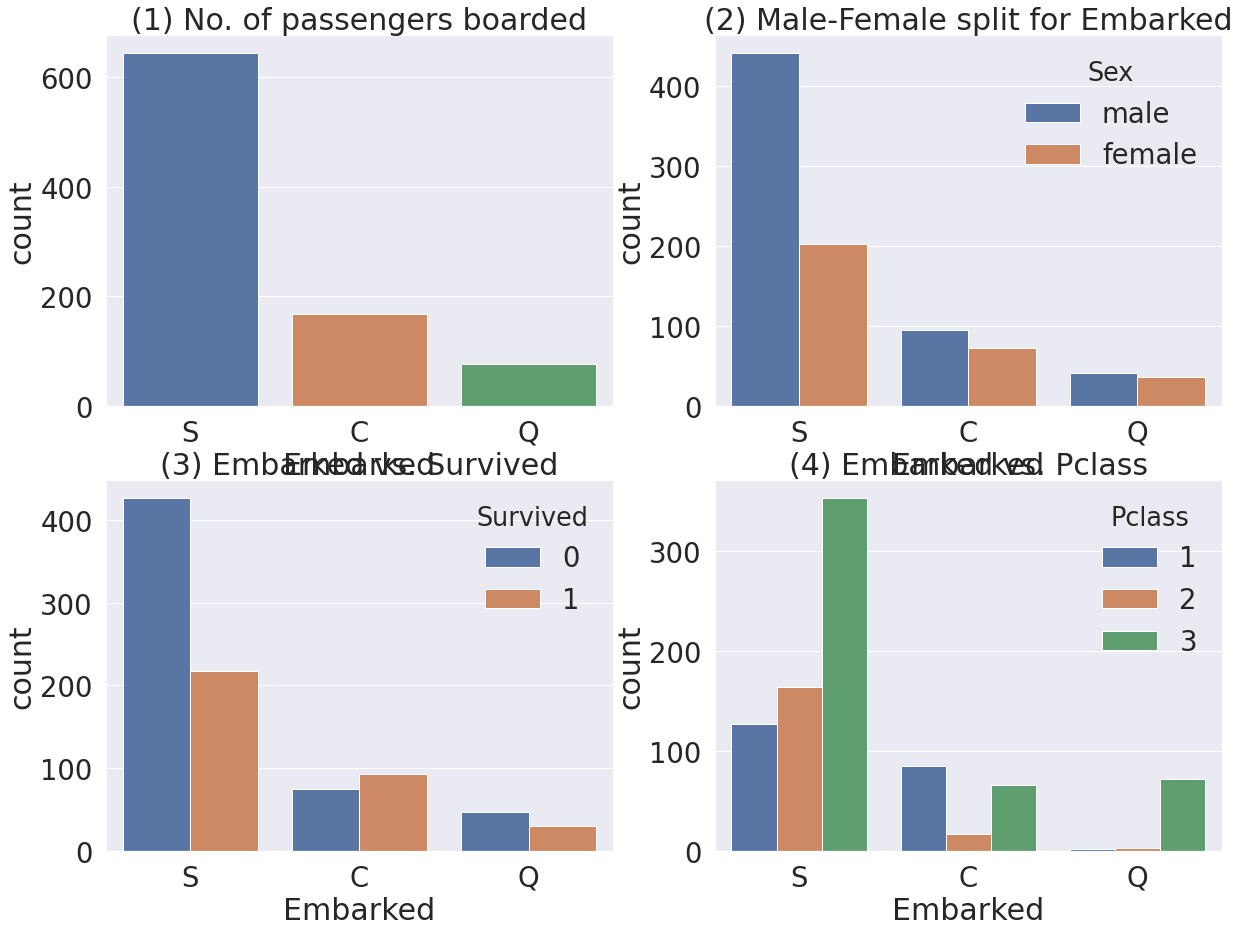

In [41]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of passengers boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs. Pclass')
plt.show()

In [42]:
### figure(1):  전체적으로 봤을 때 , S에서 가장 많은 사람이 탑승했습니다.
### figure(2): C와 Q는 남녀 비율이 비슷하고, S는 남자가 더 많습니다.
### figure(3): 생존 확률이  S경우 많이 남은 걸로 볼 수 있습니다. 
### figure(4): class로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class가 많아서 생존 확률이 낮게 나옵니다.

In [43]:
# 2.7 Family- SibSp(형제 자매) + Parch(부모, 자녀)

In [44]:
### Sibsp와 Parch를 합하면 Family가 될 것입니다. Family로 합쳐서 분석해봅시다

In [45]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] +1

In [46]:
print('Maximum size of family: ', df_train['FamilySize'].max())
print('Minimum size of family: ', df_train['FamilySize'].min())

Maximum size of family:  11
Minimum size of family:  1


In [47]:
### FamilySize와 생존관계 

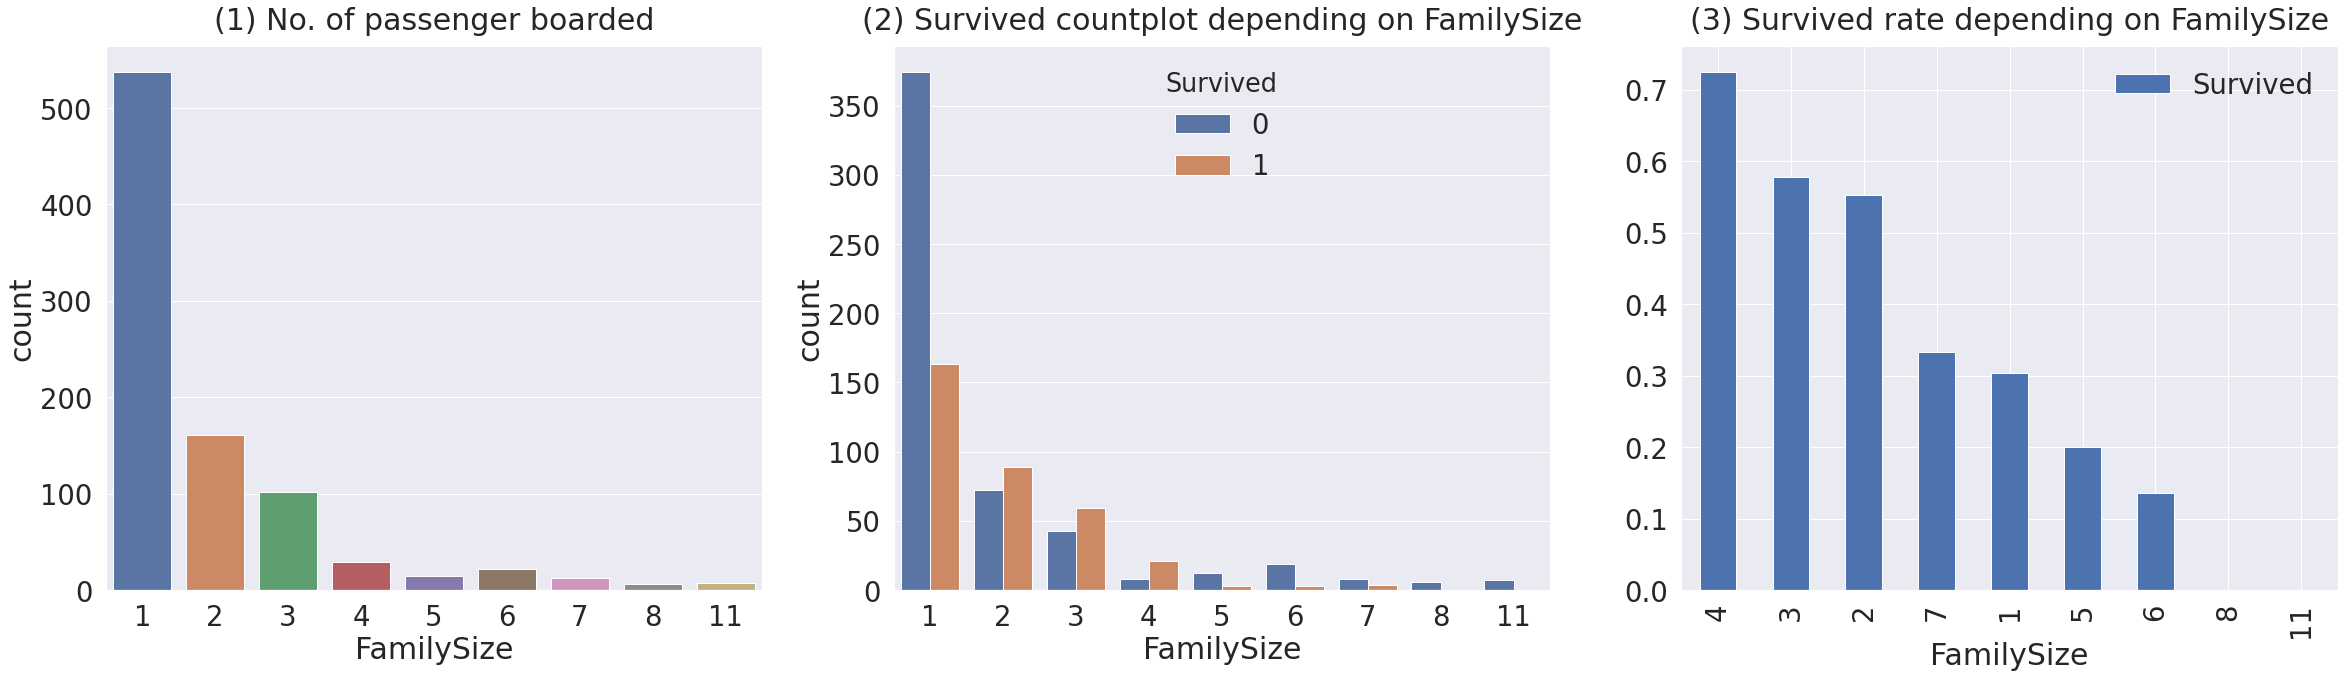

In [49]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of passenger boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [50]:
### figure(1): 가족크기가 1-11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음이 2,3,4명입니다.
### figure(2)(3): 카족 크기에 따라 생존 비교 입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족 수가 많아 질 수록 생존 확률이 낮아지네요. 가족수가 너무 작아도(1), 너무 커도(5,6,7,8,9..) 생존 확률이 작네요. 3-4명 선에서 생존 확률이 높은 걸 확인할 수 있습니다.

In [51]:
# Fare
### Fare는 탑승요금이며, contious feature입니다. 한번 histogram을 그려보겠습니다

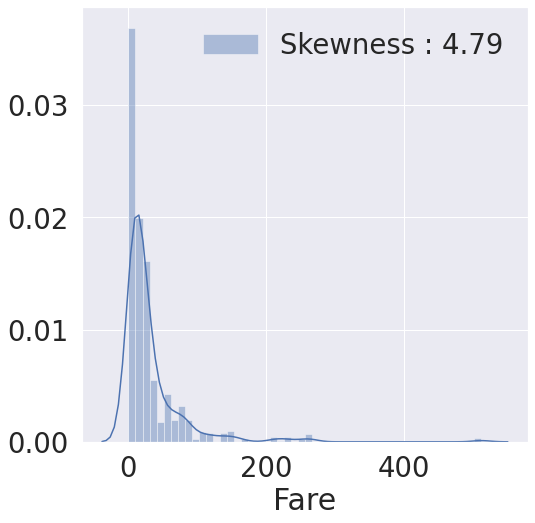

In [53]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [54]:
### 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다 (high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수 있습니다. 몇개 없는 outlier에 대해서 너무 민감하게 반응한다면, 실제 예측시 좋지 못한 결과를 부를수 있습니다.
### outlier의 영향을 줄이기 위해 fare에 log를 취하겠습니다.
### 여기서 우리는 pandas의 유용한 기능을 사요할 겁니다. dataframe의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면 아래의 map,또는 apply를 사용하면 매우 손쉽게 적용할 수 있습니다.
### 우리가 지금 원하는 것은 Fare columns의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lamda 함수를 이용해 간단한 로그를 적용하는 map에 인수를 넣어주면, fare columns 데이터에 그대로 적용이 됩니다. 